In [1]:
import numpy as np

train_data = np.load("./data/train_data.npy")
train_labels = np.load("./data/train_labels.npy")
test_data = np.load("./data/test_data.npy")
test_labels = np.load("./data/test_labels.npy")

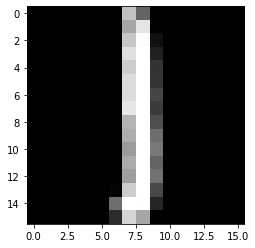

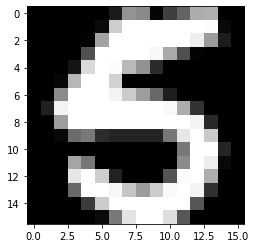

In [3]:
import matplotlib as plt
import matplotlib.pyplot as pp


# We rehape test and training data in order to turn each image into a matrix of shape: (16, 16)
train_data = np.reshape(train_data, (len(train_data), 16, 16))
test_data = np.reshape(test_data, (len(test_data), 16, 16))

# A "One"
first_image = train_data[0]
first = pp.imshow(first_image)

# A "Five"
second_image = train_data[1500]
second = pp.imshow(second_image)

# We used gray scale since we are interested in the intensity and positions of the colored pixels.
pp.figure(1)
pp.imshow(first_image, cmap = "gray")

pp.figure(2)
pp.imshow(second_image, cmap = "gray")


In [4]:
import numpy as np

# Assuming the average pixel value is a single number for each image, 
# we used np.mean function with respect to both axes.

# And for the symmetry features we first took the y-axis symmetricals of the images
# using np.flip function.
# Then we took the differences of the original images and thir y-axis symmetricals 
# using basic matrix subtraction.
# Then we take the norms of these difference matrices by using np.linalg.norm function and multiply by -1.

# For train data:
train_intensity_ar = []
train_y_sym = []
train_diff_ar = []
train_neg_norm_ar = []
for i in range(0, len(train_data)):
    train_intensity_ar.append(np.mean(train_data[i], axis=(0,1)))
    train_y_sym.append(np.flip(train_data[i], 1))
    train_diff_ar.append(train_data[i] - train_y_sym[i])
    train_neg_norm_ar.append(np.linalg.norm(train_diff_ar[i]) * -1)
    
# For test data:
test_intensity_ar = []
test_y_sym = []
test_diff_ar = []
test_neg_norm_ar = []
for i in range(0, len(test_data)):
    test_intensity_ar.append(np.mean(test_data[i], axis=(0,1)))
    test_y_sym.append(np.flip(test_data[i], 1))
    test_diff_ar.append(test_data[i] - test_y_sym[i])
    test_neg_norm_ar.append(np.linalg.norm(test_diff_ar[i]) * -1)

# We convert these lists into numpy arrays.
train_intensity_ar = np.array(train_intensity_ar)
test_intensity_ar = np.array(test_intensity_ar)

train_neg_norm_ar = np.array(train_neg_norm_ar)
test_neg_norm_ar = np.array(test_neg_norm_ar)

# Finally we concat the two features
train_rep_one = []
test_rep_one = []
for i in range(len(train_intensity_ar)):
    train_rep_one.append(np.array([train_intensity_ar[i], train_neg_norm_ar[i]]))
for i in range(len(test_intensity_ar)):
    test_rep_one.append(np.array([test_intensity_ar[i], test_neg_norm_ar[i]]))

# Final product of Representation 1:
train_rep_one = np.array(train_rep_one)
test_rep_one = np.array(test_rep_one)

# Intensity features are the 0th element of representation one while symmetry features are the 1st.
# neg_norm_ar's hold the symmetry features.




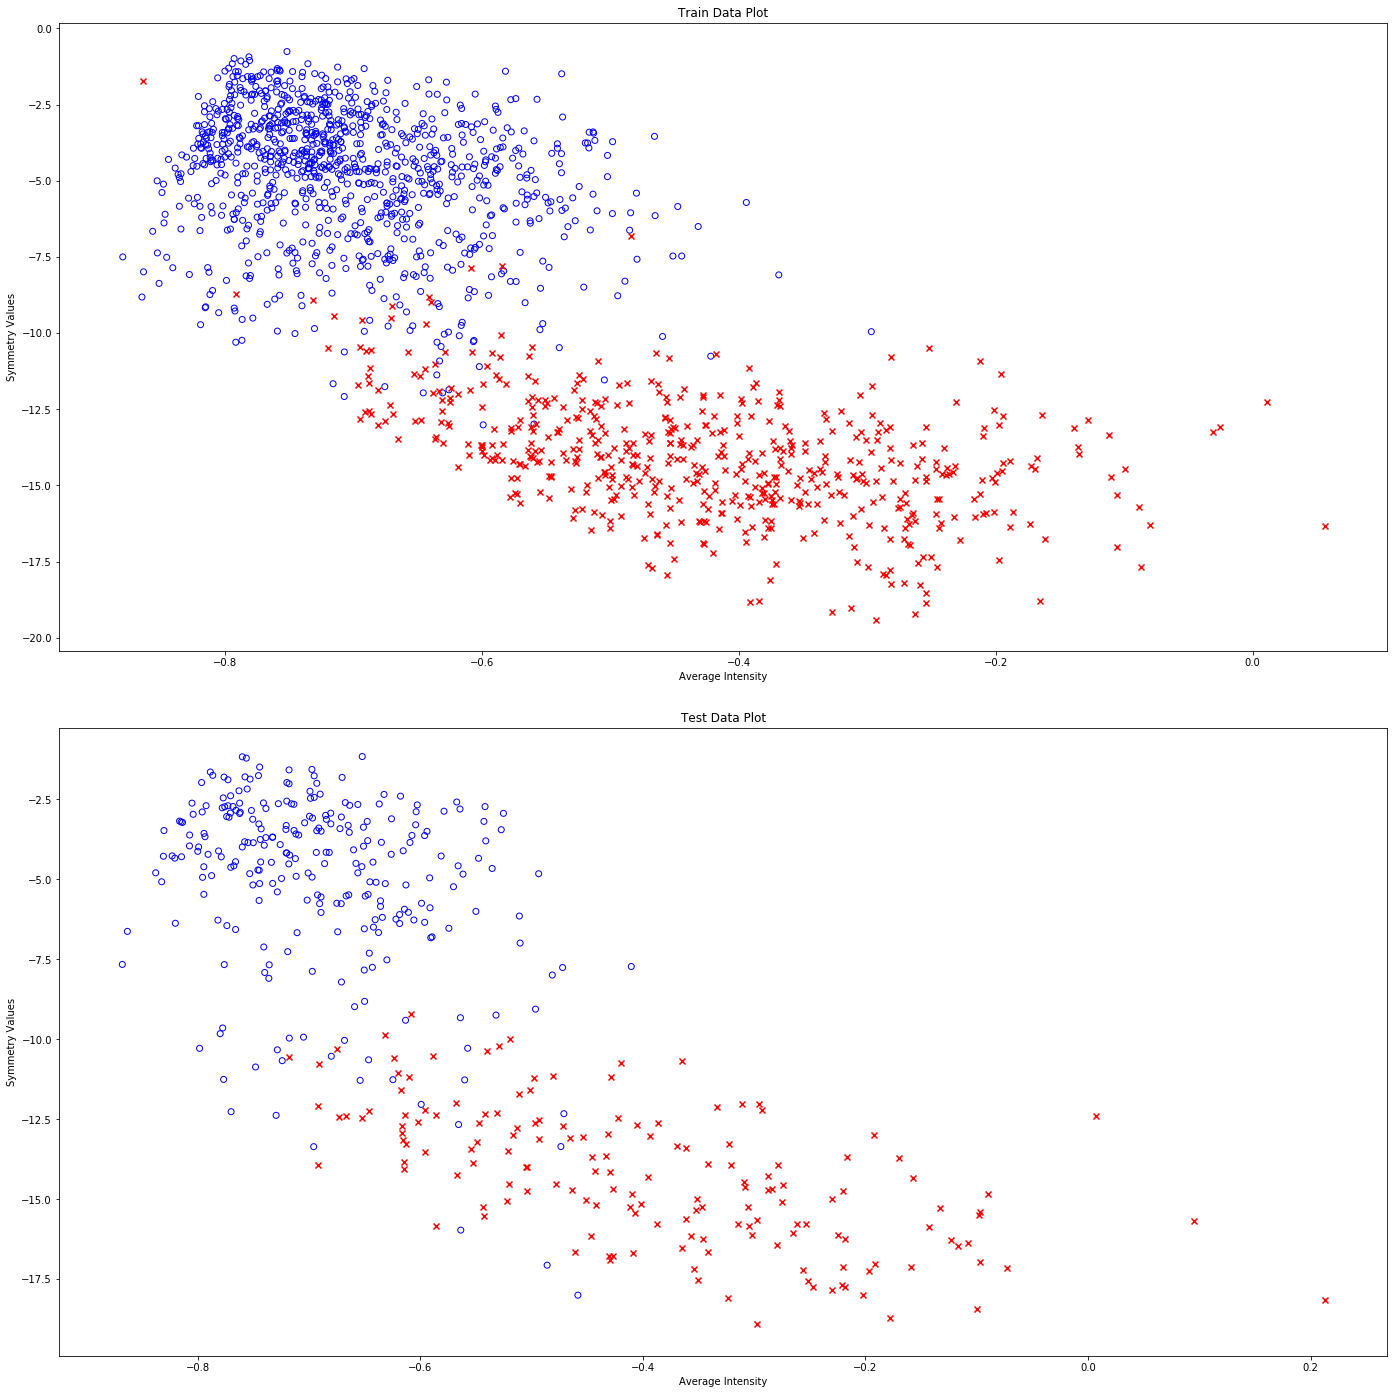

In [6]:
# Firstly, four lists are created for intensity and symmetry features of o's and x's where an o is a label 1 and 3
# an x is a label -1.
# _neg_norm arrays are for symmetry features as before.
o_intensity_train = []
o_neg_norm_train = []
x_intensity_train = []
x_neg_norm_train = []

# Then the lists are filled with relevant data 
for i in range(len(train_labels)):
    if train_labels[i] == 1:
        o_intensity_train.append(train_rep_one[i,0])
        o_neg_norm_train.append(train_rep_one[i,1])
    else:
        x_intensity_train.append(train_rep_one[i,0])
        x_neg_norm_train.append(train_rep_one[i,1])
        
# The same procedure is followed for test data.
o_intensity_test = []
o_neg_norm_test = []
x_intensity_test = []
x_neg_norm_test = []

for i in range(len(test_labels)):
    if test_labels[i] == 1:
        o_intensity_test.append(test_rep_one[i,0])
        o_neg_norm_test.append(test_rep_one[i,1])
    else:
        x_intensity_test.append(test_rep_one[i,0])
        x_neg_norm_test.append(test_rep_one[i,1])
        

# Finally, the plots are created.
pp.subplots(figsize= (20,20)) 
pp.subplot(2,1,1)
pp.title("Train Data Plot")
pp.xlabel("Average Intensity")
pp.ylabel("Symmetry Values")
pp.scatter(o_intensity_train, o_neg_norm_train, facecolors="None", edgecolors="b", marker="o")
pp.scatter(x_intensity_train, x_neg_norm_train, c="r", marker="x")
pp.subplot(2,1,2)
pp.title("Test Data Plot")
pp.xlabel("Average Intensity")
pp.ylabel("Symmetry Values")
pp.scatter(o_intensity_test, o_neg_norm_test, facecolors="None", edgecolors="b", marker="o")
pp.scatter(x_intensity_test, x_neg_norm_test, c="r", marker="x")

pp.tight_layout(pad=3.0)
pp.show()

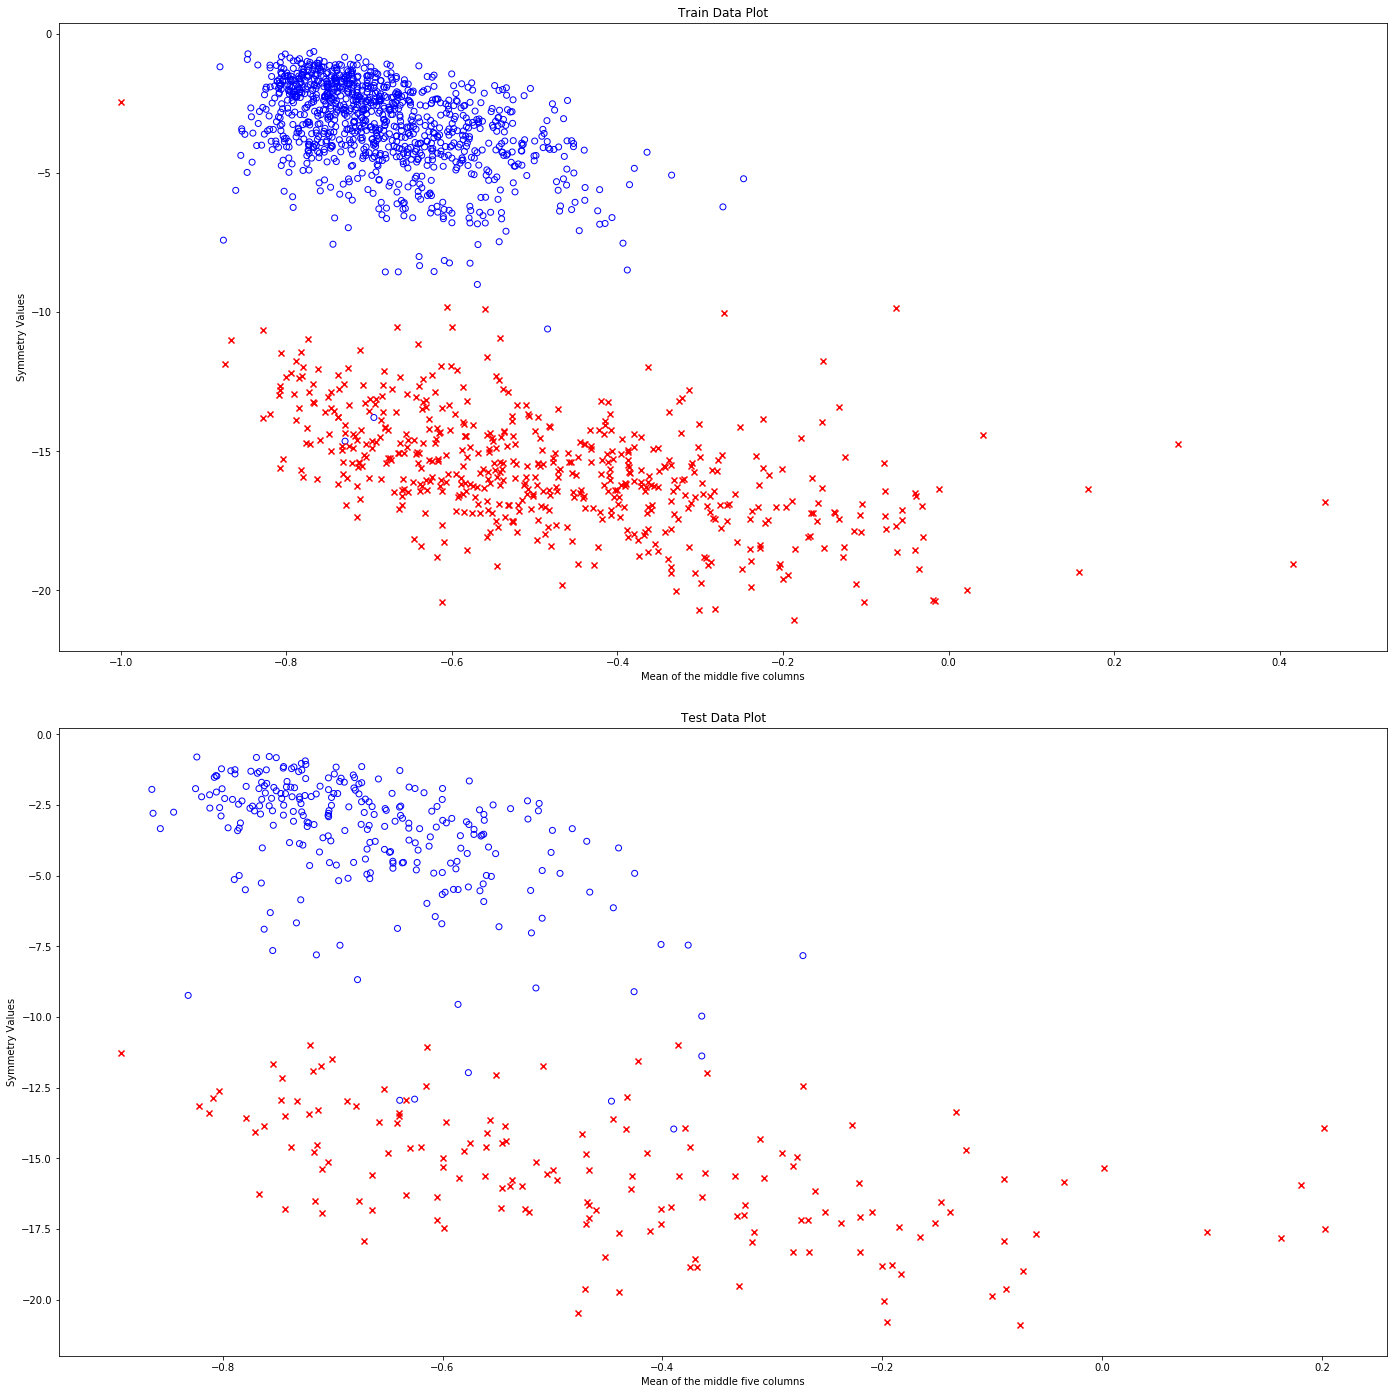

In [7]:
train_x_sym2 = []
train_diff_ar2 = []
train_neg_norm_ar2 = [] # This feature is the symmetry feature of representation 1 applied on x axis rather that y axis.
train_middle_mean = [] # This feature is the mean value of the middle five columns of each image.

for i in range(0, len(train_data)):
    train_x_sym2.append(np.flip(train_data[i], 0)) # We take the x_axis symmetric of the data.
    extracted_data = train_data[:, [6, 11]] # We take the middle 5 columns.
    train_middle_mean.append(np.mean(extracted_data[i], axis=(0,1))) # We take the mean of the middle five columns.
    train_diff_ar2.append(train_data[i] - train_x_sym2[i]) # We take the difference of the data and it's x-symmetric.
    train_neg_norm_ar2.append(np.linalg.norm(train_diff_ar2[i]) * -1) # We take the negative of the norm of the result of the previous line.

test_x_sym2 = []
test_diff_ar2 = []
test_neg_norm_ar2 = [] # This feature is the symmetry feature of representation 1 applied on x axis rather that y axis.
test_middle_mean = [] # This feature is the mean value of the middle five columns of each image.

for i in range(0, len(test_data)):
    test_x_sym2.append(np.flip(test_data[i], 0)) # We take the x_axis symmetric of the data.
    extracted_data = test_data[:, [6, 11]] # We take the middle 5 columns.
    test_middle_mean.append(np.mean(extracted_data[i], axis=(0,1))) # We take the mean of the middle five columns.
    test_diff_ar2.append(test_data[i] - test_x_sym2[i]) # We take the difference of the data and it's x-symmetric.
    test_neg_norm_ar2.append(np.linalg.norm(test_diff_ar2[i]) * -1) # We take the negative of the norm of the result of the previous line.

# Finally we concat the two features
train_rep_two = []
test_rep_two = []
for i in range(len(train_middle_mean)):
    train_rep_two.append(np.array([train_middle_mean[i], train_neg_norm_ar2[i]]))
for i in range(len(test_intensity_ar)):
    test_rep_two.append(np.array([test_middle_mean[i], test_neg_norm_ar2[i]]))

# Final product of Representation 1:
train_rep_two = np.array(train_rep_two)
test_rep_two = np.array(test_rep_two)


o_neg_norm_train2 = []
x_neg_norm_train2 = []
o_middle_mean_train = []
x_middle_mean_train = []
for i in range(len(train_labels)):
    if train_labels[i] == 1:
        o_neg_norm_train2.append(train_neg_norm_ar2[i])
        o_middle_mean_train.append(train_middle_mean[i])
    else:
        x_neg_norm_train2.append(train_neg_norm_ar2[i])
        x_middle_mean_train.append(train_middle_mean[i])
        
o_neg_norm_test2 = []
x_neg_norm_test2 = []
o_middle_mean_test = []
x_middle_mean_test = []
for i in range(len(test_labels)):
    if test_labels[i] == 1:
        o_neg_norm_test2.append(test_neg_norm_ar2[i])
        o_middle_mean_test.append(test_middle_mean[i])
    else:
        x_neg_norm_test2.append(test_neg_norm_ar2[i])
        x_middle_mean_test.append(test_middle_mean[i])

pp.subplots(figsize= (20,20)) 
pp.subplot(2,1,1)
pp.title("Train Data Plot")
pp.xlabel("Mean of the middle five columns")
pp.ylabel("Symmetry Values")
pp.scatter(o_middle_mean_train, o_neg_norm_train2, facecolors="None", edgecolors="b", marker="o")
pp.scatter(x_middle_mean_train, x_neg_norm_train2, c="r", marker="x")
pp.subplot(2,1,2)
pp.title("Test Data Plot")
pp.xlabel("Mean of the middle five columns")
pp.ylabel("Symmetry Values")
pp.scatter(o_middle_mean_test, o_neg_norm_test2, facecolors="None", edgecolors="b", marker="o")
pp.scatter(x_middle_mean_test, x_neg_norm_test2, c="r", marker="x")

pp.tight_layout(pad=3.0)
pp.show()

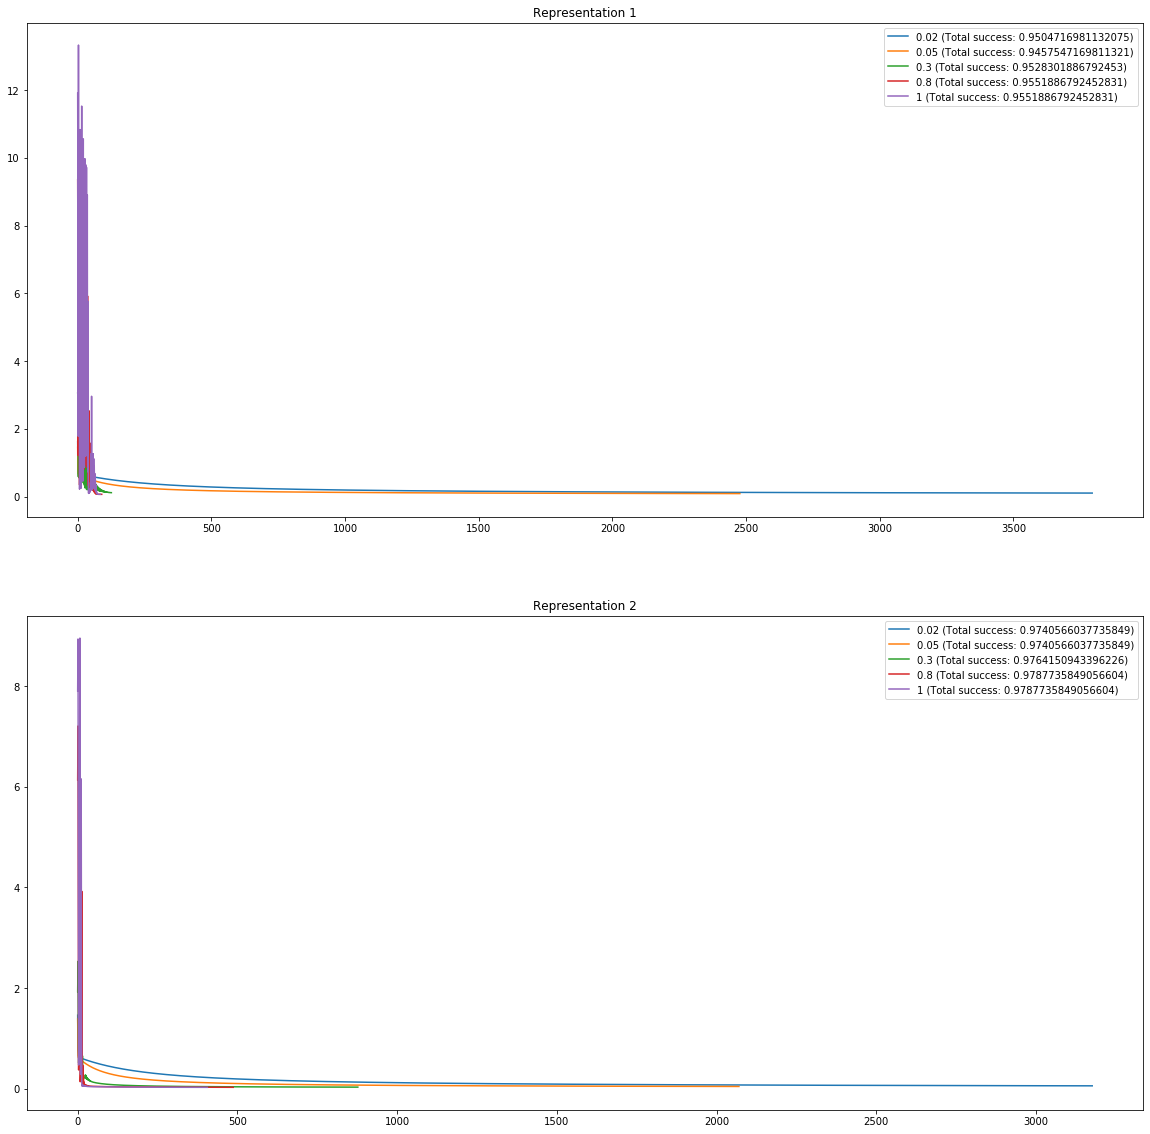

In [36]:

# The following function makes the part of the gradient calculation that is inside the sigma notation:
# (exp(-ynwTxn).(-ynxni)/(1+exp(-ynwTx)))
def inner_calc(y, w, x_vec, x_sing):
    nominator = float(np.exp(w.dot(x_vec)*y*(-1))*(y*x_sing*(-1)))
    denominator = float(1 + np.exp(w.dot(x_vec)*y*(-1)))
    return nominator/denominator
    
# This is the logistic loss function.
def loss(y, w, x_vec):
    value = np.log(1 + np.exp((-1)*y*w.dot(x_vec)))
    return value

# This is the simple sigmoid function.
def sigmoid(x):
    z = 1/(1 + np.exp(-x)) 
    return z

def train_no_reg(train_rep, train_labels, learn_rate):
    gradient_vec = []
    loss_list = []
    # we initialize w with random numbers.
    w = [0.1, 0.2, 0.3]
    w = np.array(w)
    # This is going to be the updated version of w.
    w_new = [0.1, 0.2, 0.3]
    w_new = np.array(w_new)
    v_t = [] # v_t = -gradient
    v_t = np.array(v_t)
    total_loss = 1000
    # N = len(train_rep_one)
    while True:
        prev_loss = total_loss # we use prev_loss to know when to terminate training.
        gradient_vec = [] # the gradient vector.
        w = w_new
        for i in range(len(w)): # this loop is executed 3 times, for gradient calculation
            total = 0
            for j in range(len(train_rep)): # this loop is executed N times for the sigma notation of gradient calculation
                x_vec = [1, train_rep[j][0], train_rep[j][1]] # we add the intercept term to the features.
                x_vec = np.array(x_vec)
                y = train_labels[j] # we get the label
                x_sing = x_vec[i] 
                w = np.array(w)
                inner_val = inner_calc(y, w, x_vec, x_sing)
                total += inner_val
            total = total/len(train_rep)
            gradient_vec.append(total) # we fill the gradient vector.
        gradient_vec = np.array(gradient_vec)
        v_t = gradient_vec* -1 # v_t = -gradient
        v_t = np.array(v_t)
        w_new = w + v_t*learn_rate # we update w.
        w_new = np.array(w_new)
        
        # This loop calculates the loss values for each w.
        for i in range(len(train_rep)):
            x_vec = [1, train_rep[i][0], train_rep[i][1]]
            x_vec = np.array(x_vec)
            y = train_labels[i]
            loss_val = loss(y, w_new, x_vec)
            total_loss += loss_val
        total_loss = total_loss/len(train_rep)
        
        # Losses are help in loss_list
        loss_list.append(total_loss)
        # The difference between current loss value and the loss value at 
        # the previous step is less than 10−5, exit the loop.
        if abs(prev_loss - total_loss) < 0.00001:
            break
    #pp.plot(loss_list)
    return w, loss_list
    
# Test function gets the w which is returned from the train function, a set of data, and a set of labels as arguments.
def test_no_reg(w, test_rep, test_labels):
    result_list = []
    success = 0
    my_x = np.array([1, test_rep[0][0], test_rep[0][1]])
    for i in range(len(test_labels)):
        test_result = 0
        # The result is the dot product of w vector and each row of test data.
        result = sigmoid(w.dot(np.array([1.0, test_rep[i][0], test_rep[i][1]])))
        # If the output of the sigmoid function is greater than 0.5, the image is a 1, otherwise, it is a 5.
        if result >= 0.5:
            test_result = 1
        else:
            test_result = -1
        result_list.append(test_result)
        # If the result and test label match, success is incremented.
        if result_list[i] == test_labels[i]:
            success +=1
    # total success calculation.
    #print("Total success: " + str(float(success/len(test_labels))))
    return " (Total success: " + str(float(success/len(test_labels))) + ")"

def test_no_reg_percent_return(w, test_rep, test_labels):
    result_list = []
    success = 0
    my_x = np.array([1, test_rep[0][0], test_rep[0][1]])
    for i in range(len(test_labels)):
        test_result = 0
        # The result is the dot product of w vector and each row of test data.
        result = sigmoid(w.dot(np.array([1.0, test_rep[i][0], test_rep[i][1]])))
        # If the output of the sigmoid function is greater than 0.5, the image is a 1, otherwise, it is a 5.
        if result >= 0.5:
            test_result = 1
        else:
            test_result = -1
        result_list.append(test_result)
        # If the result and test label match, success is incremented.
        if result_list[i] == test_labels[i]:
            success +=1
    # total success calculation.
    #print("Total success: " + str(float(success/len(test_labels))))
    return float(success/len(test_labels))

learning_rates = [0.02,0.05,0.3,0.8,1]
n=0
pp.subplots(figsize= (20,20))
graph = pp.subplot(2,1,1)


graph.set_title("Representation 1")

for i in learning_rates:
    train_return_1 = train_no_reg(train_rep_one, train_labels, i)
    my_w_1 = train_return_1[0]
    total_success_1 = test_no_reg(my_w_1, test_rep_one, test_labels)
    n=n+1
    graph.plot(train_return_1[1],label = str(i) + total_success_1)
    graph.legend()
   
    #my_graph.set_title(total_success)
    #my_graph.set_ylabel("Learning Rate: " + str(i))

                                  
                                  
n=0
                                  
graph2 = pp.subplot(2,1,2)
graph2.set_title("Representation 2")
for i in learning_rates:
    train_return_2 = train_no_reg(train_rep_two, train_labels, i)
    my_w_2 = train_return_2[0]
    total_success_2 = test_no_reg(my_w_2, test_rep_two, test_labels)
    n=n+1
    graph2.plot(train_return_2[1],label = str(i) + total_success_2)
    graph2.legend()



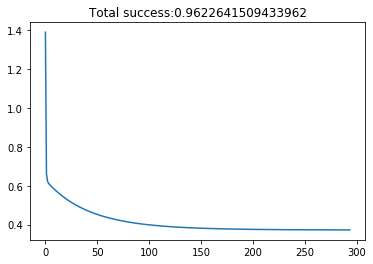

In [40]:
# Most of this block is the same as previous block (logistic regression without regularization)
# so we commented for different parts only.

def inner_calc(y, w, x_vec, x_sing):
    nominator = float(np.exp(w.dot(x_vec)*y*(-1))*(y*x_sing*(-1)))
    denominator = float(1 + np.exp(w.dot(x_vec)*y*(-1)))
    return nominator/denominator
    
def loss(y, w, x_vec):
    value = np.log(1 + np.exp((-1)*y*w.dot(x_vec)))
    return value

def sigmoid(x):
    z = 1/(1 + np.exp(-x)) 
    return z

def train(train_rep, train_labels, learn_rate, lambda1):
    gradient_vec = []
    loss_list = []
    w = [0.1, 0.2, 0.3]
    w = np.array(w)
    w_new = [0.1, 0.2, 0.3]
    w_new = np.array(w_new)
    v_t = []
    v_t = np.array(v_t)
    total_loss = 1000
    # N = len(train_rep_one)
    while True:
        prev_loss = total_loss
        gradient_vec = []
        w = w_new
        for i in range(len(w)):
            total = 0
            for j in range(len(train_rep)):
                x_vec = [1, train_rep[j][0], train_rep[j][1]]
                x_vec = np.array(x_vec)
                y = train_labels[j]
                x_sing = x_vec[i]
                w = np.array(w)
                inner_val = inner_calc(y, w, x_vec, x_sing) 
                total += inner_val
            total = total/len(train_rep) 
            total += 2*w[i]*lambda1 # regularization term is added according to the gradient calculation. 
            gradient_vec.append(total)
        gradient_vec = np.array(gradient_vec)
        v_t = gradient_vec* -1
        v_t = np.array(v_t)
        w_new = w + v_t*learn_rate
        w_new = np.array(w_new)

        for i in range(len(train_rep)):
            x_vec = [1, train_rep[i][0], train_rep[i][1]]
            x_vec = np.array(x_vec)
            y = train_labels[i]
            loss_val = loss(y, w_new, x_vec)
            total_loss += loss_val
        total_loss = total_loss/len(train_rep)
        total_loss += lambda1 * np.linalg.norm(w)*np.linalg.norm(w) # regularization term is added to the logistic loss function.
        loss_list.append(total_loss)
        # The difference between current loss value and the loss value at 
        # the previous step is less than 10−5, exit the loop.
        if abs(prev_loss - total_loss) < 0.00001:
            break
    #pp.plot(loss_list)
    return w

def train_and_plot(train_rep, train_labels, learn_rate, lambda1):
    gradient_vec = []
    loss_list = []
    w = [0.1, 0.2, 0.3]
    w = np.array(w)
    w_new = [0.1, 0.2, 0.3]
    w_new = np.array(w_new)
    v_t = []
    v_t = np.array(v_t)
    total_loss = 1000
    # N = len(train_rep_one)
    while True:
        prev_loss = total_loss
        gradient_vec = []
        w = w_new
        for i in range(len(w)):
            total = 0
            for j in range(len(train_rep)):
                x_vec = [1, train_rep[j][0], train_rep[j][1]]
                x_vec = np.array(x_vec)
                y = train_labels[j]
                x_sing = x_vec[i]
                w = np.array(w)
                inner_val = inner_calc(y, w, x_vec, x_sing) 
                total += inner_val
            total = total/len(train_rep) 
            total += 2*w[i]*lambda1 # regularization term is added according to the gradient calculation. 
            gradient_vec.append(total)
        gradient_vec = np.array(gradient_vec)
        v_t = gradient_vec* -1
        v_t = np.array(v_t)
        w_new = w + v_t*learn_rate
        w_new = np.array(w_new)

        for i in range(len(train_rep)):
            x_vec = [1, train_rep[i][0], train_rep[i][1]]
            x_vec = np.array(x_vec)
            y = train_labels[i]
            loss_val = loss(y, w_new, x_vec)
            total_loss += loss_val
        total_loss = total_loss/len(train_rep)
        total_loss += lambda1 * np.linalg.norm(w)*np.linalg.norm(w) # regularization term is added to the logistic loss function.
        loss_list.append(total_loss)
        # The difference between current loss value and the loss value at 
        # the previous step is less than 10−5, exit the loop.
        if abs(prev_loss - total_loss) < 0.00001:
            break
    pp.plot(loss_list)
    return w    

def test(w, test_rep, test_labels):
    result_list = []
    success = 0
    my_x = np.array([1, test_rep[0][0], test_rep[0][1]])
    for i in range(len(test_labels)):
        test_result = 0
        result = sigmoid(w.dot(np.array([1.0, test_rep[i][0], test_rep[i][1]])))
        if result >= 0.5:
            test_result = 1
        else:
            test_result = -1
        result_list.append(test_result)
        if result_list[i] == test_labels[i]:
            success +=1
            
    #print("Total success: " + str(float(success/len(test_labels))))
    return float(success/len(test_labels))


learning_rates = [0.05]
for i in learning_rates:
    train_return = train_and_plot(train_rep_two, train_labels, i, 0.05)
    my_w = train_return
    test_result = test(my_w, test_rep_two, test_labels)
    pp.title("Total success:" + str(test_result))



In [42]:

###################################TEST FOR REPRESENTATION 1###################################################
train_rep_one_1 = train_rep_one[0:312]
train_rep_one_2 = train_rep_one[312:624]
train_rep_one_3 = train_rep_one[624:936]
train_rep_one_4 = train_rep_one[936:1248]
train_rep_one_5 = train_rep_one[1248:]

train_labels_1 = train_labels[0:312]
train_labels_2 = train_labels[312:624]
train_labels_3 = train_labels[624:936]
train_labels_4 = train_labels[936:1248]
train_labels_5 = train_labels[1248:]

lambda_1_successes = np.array([])
lambda_2_successes = np.array([])
lambda_3_successes = np.array([])

# For the first partition:
# the test set is train_rep_one_1

my_w = train(train_rep_one[312:], train_labels[312:], 0.05, 0.05)
#print(my_w)
part_1_lambda_1_succ = test(my_w, train_rep_one_1, train_labels_1)

lambda_1_successes = np.append(lambda_1_successes, part_1_lambda_1_succ)
my_w = train(train_rep_one[312:], train_labels[312:], 0.05, 0.1)
part_1_lambda_2_succ = test(my_w, train_rep_one_1, train_labels_1)
lambda_2_successes = np.append(lambda_2_successes, part_1_lambda_2_succ)

my_w = train(train_rep_one[312:], train_labels[312:], 0.05, 0.2)
part_1_lambda_3_succ = test(my_w, train_rep_one_1, train_labels_1)
lambda_3_successes = np.append(lambda_3_successes, part_1_lambda_3_succ)

# For the second partition:
# the test set is train_rep_one_2

part_2_train_set = np.concatenate((train_rep_one_1, train_rep_one[624:]), axis=0)
part_2_test_set = train_rep_one_2
part_2_train_labels = np.concatenate((train_labels_1, train_labels[624:]), axis=0)
part_2_test_labels = train_labels_2

my_w = train(part_2_train_set, part_2_train_labels, 0.05, 0.05)
part_2_lambda_1_succ = test(my_w, part_2_test_set, part_2_test_labels)
lambda_1_successes = np.append(lambda_1_successes , part_2_lambda_1_succ)

my_w = train(part_2_train_set, part_2_train_labels, 0.05, 0.1)
part_2_lambda_2_succ = test(my_w, part_2_test_set, part_2_test_labels)
lambda_2_successes = np.append(lambda_2_successes, part_2_lambda_2_succ)

my_w = train(part_2_train_set, part_2_train_labels, 0.05, 0.2)
part_2_lambda_3_succ = test(my_w, part_2_test_set, part_2_test_labels)
lambda_3_successes = np.append(lambda_3_successes, part_2_lambda_3_succ)


# For the third partition:
# the test set is train_rep_one_3

part_3_train_set = np.concatenate((train_rep_one[0:624], train_rep_one[936:]), axis=0)
part_3_test_set = train_rep_one_3
part_3_train_labels = np.concatenate((train_labels[0:624], train_labels[936:]), axis=0)
part_3_test_labels = train_labels_3

my_w = train(part_3_train_set, part_3_train_labels, 0.05, 0.05)
part_3_lambda_1_succ = test(my_w, part_3_test_set, part_3_test_labels)
lambda_1_successes = np.append(lambda_1_successes, part_3_lambda_1_succ)

my_w = train(part_2_train_set, part_2_train_labels, 0.05, 0.1)
part_3_lambda_2_succ = test(my_w, part_3_test_set, part_3_test_labels)
lambda_2_successes = np.append(lambda_2_successes, part_3_lambda_2_succ)

my_w = train(part_2_train_set, part_2_train_labels, 0.05, 0.2)
part_3_lambda_3_succ = test(my_w, part_3_test_set, part_3_test_labels)
lambda_3_successes = np.append(lambda_3_successes, part_3_lambda_3_succ)

# For the fourth partition:
# the test set is train_rep_one_4

part_4_train_set = np.concatenate((train_rep_one[0:936], train_rep_one[1248:]), axis=0)
part_4_test_set = train_rep_one_4
part_4_train_labels = np.concatenate((train_labels[0:936], train_labels[1248:]), axis=0)
part_4_test_labels = train_labels_4

my_w = train(part_4_train_set, part_4_train_labels, 0.05, 0.05)
part_4_lambda_1_succ = test(my_w, part_4_test_set, part_4_test_labels)
lambda_1_successes = np.append(lambda_1_successes, part_4_lambda_1_succ)

my_w = train(part_4_train_set, part_4_train_labels, 0.05, 0.1)
part_4_lambda_2_succ = test(my_w, part_4_test_set, part_4_test_labels)
lambda_2_successes = np.append(lambda_2_successes, part_4_lambda_2_succ)

my_w = train(part_4_train_set, part_4_train_labels, 0.05, 0.2)
part_4_lambda_3_succ = test(my_w, part_4_test_set, part_4_test_labels)
lambda_3_successes = np.append(lambda_3_successes, part_4_lambda_3_succ)

# For the fifth partition:
# the test set is train_rep_one_5
my_w = train(train_rep_one[0:1248], train_labels[0:1248], 0.05, 0.05)
part_5_lambda_1_succ = test(my_w, train_rep_one_5, train_labels_5)
lambda_1_successes = np.append(lambda_1_successes, part_5_lambda_1_succ)

my_w = train(train_rep_one[0:1248], train_labels[0:1248], 0.05, 0.1)
part_5_lambda_2_succ = test(my_w, train_rep_one_5, train_labels_5)
lambda_2_successes = np.append(lambda_2_successes, part_5_lambda_2_succ)

my_w = train(train_rep_one[0:1248], train_labels[0:1248], 0.05, 0.2)
part_5_lambda_3_succ = test(my_w, train_rep_one_5, train_labels_5)
lambda_3_successes = np.append(lambda_3_successes, part_5_lambda_3_succ)
print("VALUES FOR REPRESENTATION 1: ")
print("\n")
print("Success rates for λ = 0.05 for each partition are :")
print(lambda_1_successes)
print("Standard deviation for λ = 0.05 is: " + str(np.std(lambda_1_successes)))
print("and mean for λ = 0.05 is: "+ str(np.mean(lambda_1_successes)))
print("\n")
print("Success rates for λ = 0.1 for each partition are :")
print(lambda_2_successes)
print("Standard deviation for λ = 0.1 is: " + str(np.std(lambda_2_successes)))
print("and mean for λ = 0.1 is: "+ str(np.mean(lambda_2_successes)))
print("\n")
print("Success rates for λ = 0.2 for each partition are :")
print(lambda_3_successes)
print("Standard deviation for λ = 0.2 is: " + str(np.std(lambda_3_successes)))
print("and mean for λ = 0.2 is: "+ str(np.mean(lambda_3_successes)))
print("\n")
print("\n")
###################################TEST FOR REPRESENTATION 2###################################################
train_rep_one_1 = train_rep_two[0:312]
train_rep_one_2 = train_rep_two[312:624]
train_rep_one_3 = train_rep_two[624:936]
train_rep_one_4 = train_rep_two[936:1248]
train_rep_one_5 = train_rep_two[1248:]

train_labels_1 = train_labels[0:312]
train_labels_2 = train_labels[312:624]
train_labels_3 = train_labels[624:936]
train_labels_4 = train_labels[936:1248]
train_labels_5 = train_labels[1248:]

lambda_1_successes = np.array([])
lambda_2_successes = np.array([])
lambda_3_successes = np.array([])

# For the first partition:
# the test set is train_rep_one_1

my_w = train(train_rep_one[312:], train_labels[312:], 0.05, 0.05)
#print(my_w)
part_1_lambda_1_succ = test(my_w, train_rep_one_1, train_labels_1)

lambda_1_successes = np.append(lambda_1_successes, part_1_lambda_1_succ)
my_w = train(train_rep_one[312:], train_labels[312:], 0.05, 0.1)
part_1_lambda_2_succ = test(my_w, train_rep_one_1, train_labels_1)
lambda_2_successes = np.append(lambda_2_successes, part_1_lambda_2_succ)

my_w = train(train_rep_one[312:], train_labels[312:], 0.05, 0.2)
part_1_lambda_3_succ = test(my_w, train_rep_one_1, train_labels_1)
lambda_3_successes = np.append(lambda_3_successes, part_1_lambda_3_succ)

# For the second partition:
# the test set is train_rep_one_2

part_2_train_set = np.concatenate((train_rep_one_1, train_rep_one[624:]), axis=0)
part_2_test_set = train_rep_one_2
part_2_train_labels = np.concatenate((train_labels_1, train_labels[624:]), axis=0)
part_2_test_labels = train_labels_2

my_w = train(part_2_train_set, part_2_train_labels, 0.05, 0.05)
part_2_lambda_1_succ = test(my_w, part_2_test_set, part_2_test_labels)
lambda_1_successes = np.append(lambda_1_successes , part_2_lambda_1_succ)

my_w = train(part_2_train_set, part_2_train_labels, 0.05, 0.1)
part_2_lambda_2_succ = test(my_w, part_2_test_set, part_2_test_labels)
lambda_2_successes = np.append(lambda_2_successes, part_2_lambda_2_succ)

my_w = train(part_2_train_set, part_2_train_labels, 0.05, 0.2)
part_2_lambda_3_succ = test(my_w, part_2_test_set, part_2_test_labels)
lambda_3_successes = np.append(lambda_3_successes, part_2_lambda_3_succ)


# For the third partition:
# the test set is train_rep_one_3

part_3_train_set = np.concatenate((train_rep_one[0:624], train_rep_one[936:]), axis=0)
part_3_test_set = train_rep_one_3
part_3_train_labels = np.concatenate((train_labels[0:624], train_labels[936:]), axis=0)
part_3_test_labels = train_labels_3

my_w = train(part_3_train_set, part_3_train_labels, 0.05, 0.05)
part_3_lambda_1_succ = test(my_w, part_3_test_set, part_3_test_labels)
lambda_1_successes = np.append(lambda_1_successes, part_3_lambda_1_succ)

my_w = train(part_2_train_set, part_2_train_labels, 0.05, 0.1)
part_3_lambda_2_succ = test(my_w, part_3_test_set, part_3_test_labels)
lambda_2_successes = np.append(lambda_2_successes, part_3_lambda_2_succ)

my_w = train(part_2_train_set, part_2_train_labels, 0.05, 0.2)
part_3_lambda_3_succ = test(my_w, part_3_test_set, part_3_test_labels)
lambda_3_successes = np.append(lambda_3_successes, part_3_lambda_3_succ)

# For the fourth partition:
# the test set is train_rep_one_4

part_4_train_set = np.concatenate((train_rep_one[0:936], train_rep_one[1248:]), axis=0)
part_4_test_set = train_rep_one_4
part_4_train_labels = np.concatenate((train_labels[0:936], train_labels[1248:]), axis=0)
part_4_test_labels = train_labels_4

my_w = train(part_4_train_set, part_4_train_labels, 0.05, 0.05)
part_4_lambda_1_succ = test(my_w, part_4_test_set, part_4_test_labels)
lambda_1_successes = np.append(lambda_1_successes, part_4_lambda_1_succ)

my_w = train(part_4_train_set, part_4_train_labels, 0.05, 0.1)
part_4_lambda_2_succ = test(my_w, part_4_test_set, part_4_test_labels)
lambda_2_successes = np.append(lambda_2_successes, part_4_lambda_2_succ)

my_w = train(part_4_train_set, part_4_train_labels, 0.05, 0.2)
part_4_lambda_3_succ = test(my_w, part_4_test_set, part_4_test_labels)
lambda_3_successes = np.append(lambda_3_successes, part_4_lambda_3_succ)

# For the fifth partition:
# the test set is train_rep_one_5
my_w = train(train_rep_one[0:1248], train_labels[0:1248], 0.05, 0.05)
part_5_lambda_1_succ = test(my_w, train_rep_one_5, train_labels_5)
lambda_1_successes = np.append(lambda_1_successes, part_5_lambda_1_succ)

my_w = train(train_rep_one[0:1248], train_labels[0:1248], 0.05, 0.1)
part_5_lambda_2_succ = test(my_w, train_rep_one_5, train_labels_5)
lambda_2_successes = np.append(lambda_2_successes, part_5_lambda_2_succ)

my_w = train(train_rep_one[0:1248], train_labels[0:1248], 0.05, 0.2)
part_5_lambda_3_succ = test(my_w, train_rep_one_5, train_labels_5)
lambda_3_successes = np.append(lambda_3_successes, part_5_lambda_3_succ)
print("VALUES FOR REPRESENTATION 2: ")
print("\n")
print("Success rates for λ = 0.05 for each partition are :")
print(lambda_1_successes)
print("Standard deviation for λ = 0.05 is: " + str(np.std(lambda_1_successes)))
print("and mean for λ = 0.05 is: "+ str(np.mean(lambda_1_successes)))
print("\n")
print("Success rates for λ = 0.1 for each partition are :")
print(lambda_2_successes)
print("Standard deviation for λ = 0.1 is: " + str(np.std(lambda_2_successes)))
print("and mean for λ = 0.1 is: "+ str(np.mean(lambda_2_successes)))
print("\n")
print("Success rates for λ = 0.2 for each partition are :")
print(lambda_3_successes)
print("Standard deviation for λ = 0.2 is: " + str(np.std(lambda_3_successes)))
print("and mean for λ = 0.2 is: "+ str(np.mean(lambda_3_successes)))



VALUES FOR REPRESENTATION 1: 


Success rates for λ = 0.05 for each partition are :
[0.88782051 0.89423077 0.90705128 0.97435897 0.88817891]
Standard deviation for λ = 0.05 is: 0.03276276056026873
and mean for λ = 0.05 is: 0.9103280904399116


Success rates for λ = 0.1 for each partition are :
[0.82371795 0.78846154 0.77564103 0.97115385 0.71565495]
Standard deviation for λ = 0.1 is: 0.08553695828907473
and mean for λ = 0.1 is: 0.8149258622102072


Success rates for λ = 0.2 for each partition are :
[0.63461538 0.61858974 0.61858974 0.95833333 0.07348243]
Standard deviation for λ = 0.2 is: 0.2848349456306998
and mean for λ = 0.2 is: 0.5807221266486443




VALUES FOR REPRESENTATION 2: 


Success rates for λ = 0.05 for each partition are :
[0.9775641  0.97115385 0.98076923 0.98397436 0.92971246]
Standard deviation for λ = 0.05 is: 0.019917695968806656
and mean for λ = 0.05 is: 0.9686347997050871


Success rates for λ = 0.1 for each partition are :
[0.94871795 0.92628205 0.91987179 0.98397

In [37]:
train_return_1 = train_no_reg(train_rep_one, train_labels, 1) #best learning rate is 0.8 and 1, both gave the same success
my_w_1 = train_return_1[0]
total_success_1 = test_no_reg_percent_return(my_w_1, test_rep_one, test_labels)
print ("With best learning rate, Representation 1 with logistic regression classifier has a success rate of %" + str(total_success_1*100))
train_return_2 = train_no_reg(train_rep_two, train_labels, 1)
my_w_2 = train_return_2[0]
total_success_2 = test_no_reg_percent_return(my_w_2, test_rep_two, test_labels)
print ("With best learning rate, Representation 2 with logistic regression classifier has a success rate of %" + str(total_success_2*100))

With best learning rate, Representation 1 with logistic regression classifier has a success rate of %95.51886792452831
With best learning rate, Representation 2 with logistic regression classifier has a success rate of %97.87735849056604


In [39]:
#Best 𝜆 obtained by 5-fold cross validation is 0.05
train_return = train(train_rep_one, train_labels, 0.05, 0.05)
my_w = train_return
test_result = test(my_w, test_rep_one, test_labels)
print ("With best 𝜆, Representation 1 with regularized logistic regression classifier has a success rate of %" + str(test_result*100))
train_return = train(train_rep_two, train_labels, 0.05, 0.05)
my_w = train_return
test_result = test(my_w, test_rep_two, test_labels)
print ("With best 𝜆, Representation 2 with regularized logistic regression classifier has a success rate of %" + str(test_result*100))

With best 𝜆, Representation 1 with regularized logistic regression classifier has a success rate of %91.98113207547169
With best 𝜆, Representation 2 with regularized logistic regression classifier has a success rate of %96.22641509433963


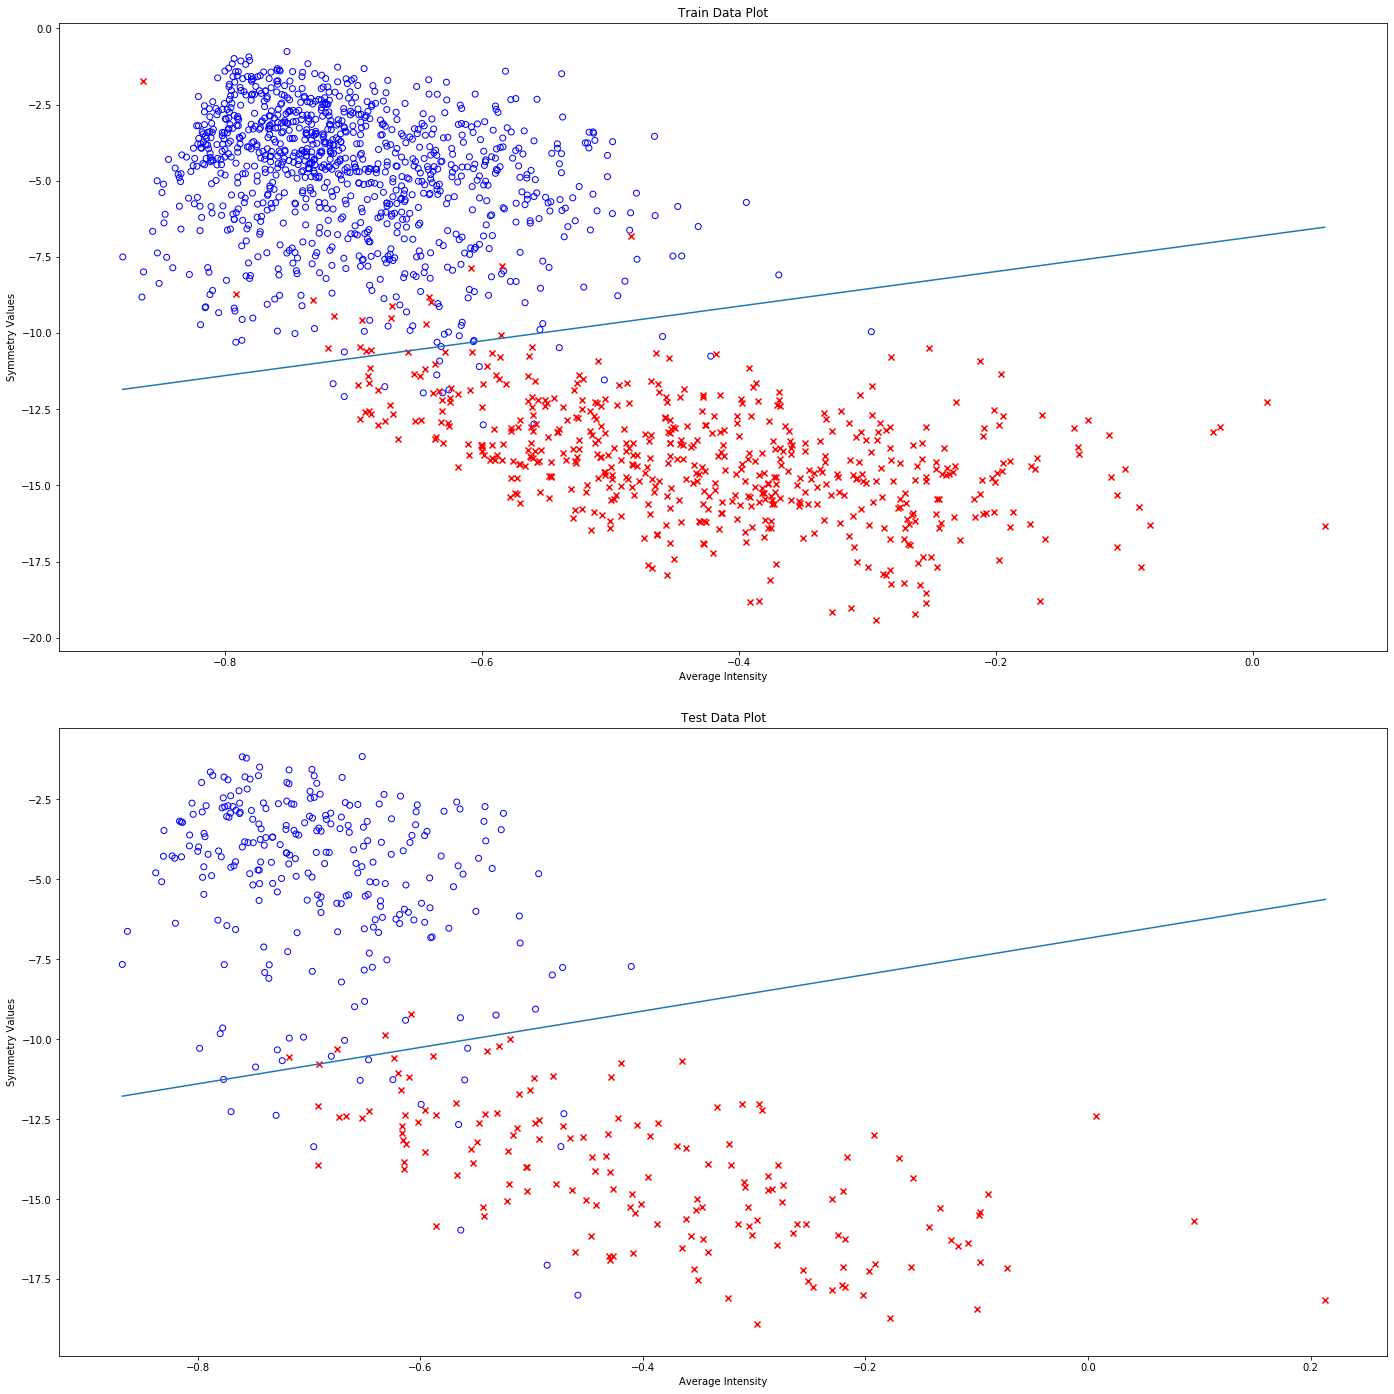

In [33]:
# Getting the w1, w2, and w3 values of w.
returned_w = train_no_reg(train_rep_one, train_labels, 1)
w_1 = returned_w[0][0]
w_2 = returned_w[0][1]
w_3 = returned_w[0][2]
#######################################TRAIN DATA VISUALIZATION########################################################
x_train_min = min(min(o_intensity_train),min(x_intensity_train))
x_train_max = max(max(o_intensity_train),max(x_intensity_train))
x = np.linspace(x_train_min, x_train_max, 1000)
graphed_value = (w_2/w_3)*-1 
pp.subplots(figsize= (20,20)) 
pp.subplot(2,1,1)
pp.title("Train Data Plot")
pp.xlabel("Average Intensity")
pp.ylabel("Symmetry Values")
#same scatter functions used in part 1
pp.scatter(o_intensity_train, o_neg_norm_train, facecolors="None", edgecolors="b", marker="o")
pp.scatter(x_intensity_train, x_neg_norm_train, c="r", marker="x")
pp.plot(x, (x*(w_2/w_3)*-1) - (w_1/w_3), linestyle='solid' )# trained regression line

#######################################TEST DATA VISUALIZATION########################################################
x_test_min = min(min(o_intensity_test),min(x_intensity_test))
x_test_max = max(max(o_intensity_test),max(x_intensity_test))
x = np.linspace(x_test_min, x_test_max, 1000)
pp.subplot(2,1,2)
pp.title("Test Data Plot")
pp.xlabel("Average Intensity")
pp.ylabel("Symmetry Values")
#same scatter functions used in part 1
pp.scatter(o_intensity_test, o_neg_norm_test, facecolors="None", edgecolors="b", marker="o")
pp.scatter(x_intensity_test, x_neg_norm_test, c="r", marker="x")
pp.plot(x, (x*(w_2/w_3)*-1) - (w_1/w_3), linestyle='solid' ) # trained regression line

pp.tight_layout(pad=3.0)
pp.show()